# ❌ Why Linear Regression Fails for Classification Tasks

---

## 🧠 Context: Linear Regression Assumption

Linear regression is designed to predict **continuous numeric values** using the formula:

$$
\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n
$$

It assumes the output \( y \) can take **any real number** (e.g., house prices, temperatures).

---

## 🚫 Problem 1: Output Can Be Outside Valid Range

For classification tasks (like predicting 0 or 1), we want:

-  $(\ \hat{y} = 0 )$: Negative class
-  $(\ \hat{y} = 1 )$: Positive class

But linear regression can predict:

- $(\ \hat{y} = -5\ )$
- $(\ \hat{y} = 2.7\ )$
- Or any number in $( (\ -\infty, \ +\infty) ) $

⚠️ This doesn't make sense for probabilities or categories.

---

## 🚫 Problem 2: Not a Probabilistic Model

Linear regression doesn’t model **probabilities**. But in classification:

- We often want a probability that the input belongs to class 1.
- Linear regression has no constraint to ensure outputs fall in \([0, 1]\).

---

## 🚫 Problem 3: Poor Decision Boundaries

Even if we try to threshold:

- Say: If $(\ \hat{y}\ \geq 0.5\ )$, then class = 1; else class = 0
- This rule is **arbitrary** and not backed by probability theory.

Also, in **multiclass classification**, linear regression cannot:

- Assign probabilities to multiple classes that sum to 1.
- Create **non-linear** decision boundaries (if needed).

---

## ✅ Logistic Regression to the Rescue!

Logistic regression fixes these problems by:

- Using a **sigmoid** to squash output into \([0, 1]\):

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}, \quad \text{where } z = w^\top x + b
$$

- Modeling the probability of a class label.
- Optimizing with **cross-entropy loss**, which fits classification better.

---

## 🧠 Summary

| Linear Regression | Logistic Regression |
|-------------------|---------------------|
| Output: any real value | Output: [0, 1] probability |
| Not suitable for classification | Designed for classification |
| No probabilistic interpretation | Directly models class probabilities |
| Poor boundaries | Good decision boundaries |

---


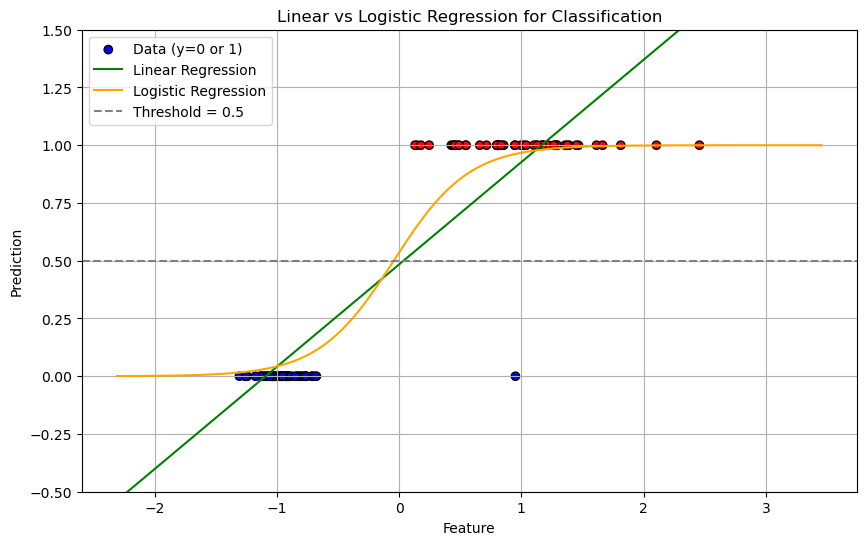

In [2]:
# Linear vs Logistic Regression on Classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=100, n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Fit Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# Fit Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X, y)
y_pred_log = log_reg.predict_proba(X)[:, 1]  # Probability for class 1

# Plotting
x_vals = np.linspace(X.min() - 1, X.max() + 1, 300).reshape(-1, 1)
y_lin_curve = lin_reg.predict(x_vals)
y_log_curve = log_reg.predict_proba(x_vals)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(X, y, c=y, cmap='bwr', edgecolors='k', label="Data (y=0 or 1)")
plt.plot(x_vals, y_lin_curve, label="Linear Regression", color="green")
plt.plot(x_vals, y_log_curve, label="Logistic Regression", color="orange")
plt.axhline(0.5, color='gray', linestyle='--', label='Threshold = 0.5')
plt.title("Linear vs Logistic Regression for Classification")
plt.xlabel("Feature")
plt.ylabel("Prediction")
plt.ylim(-0.5, 1.5)
plt.legend()
plt.grid(True)
plt.show()

# 🧠 How Linear Regression Formula Is Used in Logistic Regression

---

## ✅ Step 1: Start with Linear Regression Formula

Linear regression predicts a continuous output:

$$
z = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n = \mathbf{w}^\top \mathbf{x} + b
$$

- $\mathbf{x}$: Feature vector (input)  
- $\mathbf{w}$: Weight vector (learned parameters)  
- $b$: Bias term (intercept)  
- $z$: Output from linear combination  

---

## 🚨 Problem: For Classification, We Need Probabilities

But we don’t want raw outputs like 2.7 or -1.3 — we want **probabilities** for class 1:

- Must be in range \( [0, 1] \)
- Interpretable as a **likelihood**

---

## ✅ Step 2: Pass Linear Output Through Sigmoid

To turn linear output into a probability:

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

So the full **logistic regression model** becomes:

$$
\hat{y} = \frac{1}{1 + e^{-(\mathbf{w}^\top \mathbf{x} + b)}}
$$

---

## 🔍 Intuition:

- Small $z \ll 0$ → $\hat{y} \approx 0$
- Large $z \gg 0$ → $\hat{y} \approx 1$
- $z = 0$ → $\hat{y} = 0.5$ → perfect uncertainty

---

## 📊 Summary:

| Model              | Formula                                      | Output Range         | Used For                     |
|-------------------|----------------------------------------------|-----------------------|------------------------------|
| Linear Regression  | $\hat{y} = \mathbf{w}^\top \mathbf{x} + b$  | $(-\infty, +\infty)$  | Regression (continuous)      |
| Logistic Regression| $\hat{y} = \frac{1}{1 + e^{-(\mathbf{w}^\top \mathbf{x} + b)}}$ | $[0, 1]$              | Classification (probability) |

---

## ✅ Conclusion:

👉 Logistic regression **starts with linear regression** to compute a score and then applies a **sigmoid function** to convert it into a **probability**.

